# Behaviour Driving

The goal of this project is to teach a virtual vehicle to drive using only the driving data that we have collected in a simulator. This idea is most recently based on a paper by NVIDIA called [End To End Driving For Self-Driving Cars](https://arxiv.org/abs/1604.07316).

## Loading The Dataset

In [17]:
# Visualizations will be shown in the notebook.
%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import cv2

In [57]:
path = '../datasets/behavioural_driving'
img_path = '../datasets/behavioural_driving/IMG'
models_path = "./models"

In [4]:
data_csv = pd.read_csv(path + '/driving_log.csv', header=None, 
                       names = ["Center", "Left", "Right", "Steering Angle", "Throttle", "Brake","Speed"])
data_csv.head(n=10)

,Center,Left,Right,Steering Angle,Throttle,Brake,Speed
0,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,0.000000,0.000000,0,3.159878e-06
1,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,0.000000,0.000000,0,3.875714e-07
2,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,0.000000,0.010726,0,2.983444e-02
3,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,-0.094481,1.000000,0,9.546133e-01
4,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,-0.094481,1.000000,0,2.342761e+00
5,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,-0.094481,1.000000,0,3.502663e+00
6,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,-0.094481,1.000000,0,4.441855e+00
7,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,-0.094481,1.000000,0,5.833841e+00
8,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,-0.094481,1.000000,0,6.523817e+00
9,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,/Users/eddieforson/Desktop/Behavioural_Driving...,-0.148961,1.000000,0,7.435661e+00


In [19]:
img_count = data_csv.shape[0]
print("Dataset counts {0} rows".format(img_count))

Dataset counts 1042 rows


In [42]:
# Let's import all our images and steering angles
X_train = np.zeros((img_count, 160, 320, 3), dtype=np.uint8)
y_train = np.zeros((img_count), dtype=np.float32)
for index, row in data_csv.iterrows():
    center_img_path = "{0}/{1}".format(img_path,row["Center"].split("/")[-1])
    #print(center_img_path)
    # OpenCV returns Height x Width x RGB
    img = cv2.imread(center_img_path)
    X_train[index] = img
    y_train[index] = row["Steering Angle"]

In [43]:
print("Shape of training set images: {0}\nShape of training set labels: {1}".format(X_train.shape, y_train.shape))

Shape of training set images: (1042, 160, 320, 3)
Shape of training set labels: (1042,)


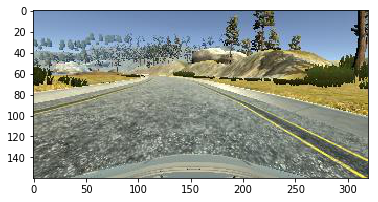

In [45]:
# Let's visualise an image
plt.imshow(cv2.cvtColor(X_train[100], cv2.COLOR_BGR2RGB), cmap=None)
plt.show()

## Build A Neural Net To Predict Steering Angles

We are using Keras, which in turn delegates to Tensorflow under the hood. Let's import all the functions we need.

In [46]:
# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [47]:
# Let's also define the input shape
in_shape = (160, 320, 3)

### Simple Model

In this section we create a simple model to predict steering angles. There are no convolutions in this architecture, and since this is a pure _regression_ problem, and not a _classification_ one, we will be using the [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) as the activation function in the last layer.

In [55]:
def simple_model():
    model = Sequential()
    model.add(Flatten(input_shape=in_shape))
    model.add(Dense(1))
    
    model.compile(loss = "mse", optimizer = "adam", metrics=['accuracy'])
    return model

In [56]:
m = simple_model()
m.fit(X_train, y_train, nb_epoch=50, validation_split=0.2, shuffle=True)

Train on 833 samples, validate on 209 samples
Epoch 1/50
833/833 [==============================] - 0s - loss: 39056824.5932 - acc: 0.0000e+00 - val_loss: 3604094.7727 - val_acc: 0.0000e+00
Epoch 2/50
833/833 [==============================] - 0s - loss: 2298513.0774 - acc: 0.0000e+00 - val_loss: 87626.0027 - val_acc: 0.0000e+00
Epoch 3/50
833/833 [==============================] - 0s - loss: 214777.4788 - acc: 0.0000e+00 - val_loss: 8013.3574 - val_acc: 0.0048
Epoch 4/50
833/833 [==============================] - 0s - loss: 22306.6059 - acc: 0.0012 - val_loss: 4129.1336 - val_acc: 0.0096
Epoch 5/50
833/833 [==============================] - 0s - loss: 9321.1782 - acc: 0.0012 - val_loss: 11009.5693 - val_acc: 0.0000e+00
Epoch 6/50
833/833 [==============================] - 0s - loss: 9626.8490 - acc: 0.0036 - val_loss: 8721.3686 - val_acc: 0.0048
Epoch 7/50
833/833 [==============================] - 0s - loss: 7627.8874 - acc: 0.0036 - val_loss: 3141.8168 - val_acc: 0.0144
Epoch 8/50
8

In [58]:
m.save("{0}/simple_model.h5".format(models_path))